In [1]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

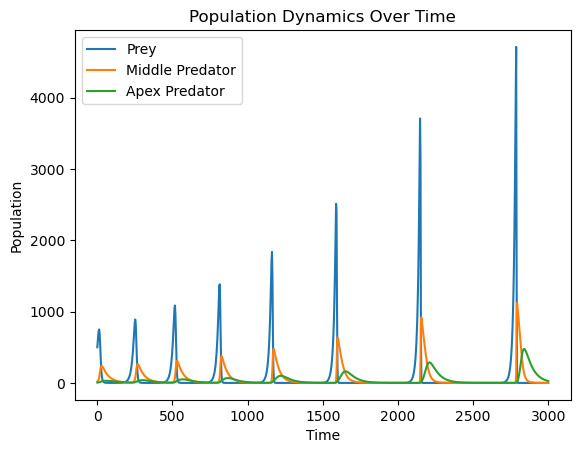

In [ ]:
# Model 4a1 (Chain 1): 1 prey, 1 middle predator (can eat only the prey), and 1 apex predator (can eat both the prey and middle predator)

# x = population density of prey
# y = population density of middle predator
# z = population density of apex predator

a = 0.08 # 0.5 # prey growth rate

b1 = 0.001 # 0.1 # middle predator kill rate
c1 = 0.02 # 0.1 # middle predator death rate
d1 = 0.0002 # 0.1 # middle predator growth rate from eating prey

b21 = 0.001 # 0.1 # apex predator kill rate of prey
b22 = 0.0001 #0.1 #apex predator kill rate of middle predator
c2 = 0.02 # 0.1 # apex predator death rate
d21 = 0.0001 # 0.1 # apex predator growth rate from eating prey
d22 = 0.00015 # 0.1 # apex predator growth rate from eating middle predator

# defining the Lotka-Volterra differential equations
def dSdt(S, t):
    x, y, z = S
    return [a*x - b1*x*y - b21*x*z,
            -c1*y + d1*x*y - b22*y*z,
            -c2*z + d21*x*z + d22*y*z
           ]

x0 = 500 # initial prey population
y0 = 20 # initial middle predator population
z0 = 5 #initial apex predator population
S0 = (x0, y0, z0)

t = np.linspace(0, 3000, 1000) # time array

sol1 = odeint(dSdt, S0, t) # solving differential equations

sol_x1 = sol1[:, 0] # prey population over time
sol_y1 = sol1[:, 1] # middle predator population over time
sol_z1 = sol1[:, 2] # apex predator population over time

# Plotting populations over time
plt.plot(t, sol_x1, label = "Prey")
plt.plot(t, sol_y1, label = "Middle Predator")
plt.plot(t, sol_z1, label = "Apex Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time")
plt.show()

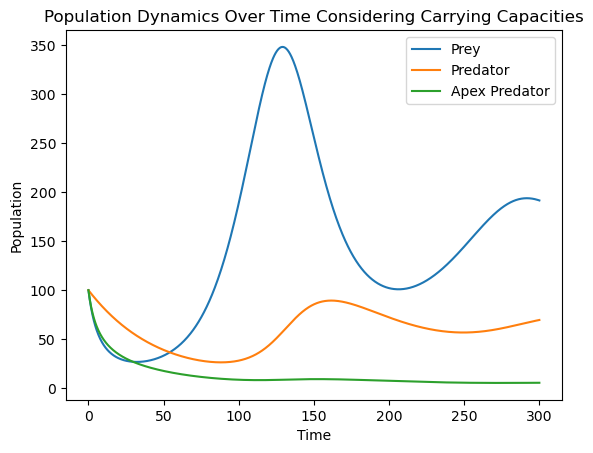

5.5011621428126345


In [ ]:
# Model 4a2 (Chain1): 1 prey, 1 middle predator (can eat only the prey), and 1 apex predator (can eat both the prey and middle predator), with carrying capacity

# carrying capacity of an environment = the maximum population size of a biological species that can be 
# sustained by that specific environment, given the food, habitat, water, and other resources available (Wikipedia)

k1 = 2000 # carrying capacity of prey population
k2 = 200 # carrying capacity of middle predator population
k3 = 20 # carrying capacity of apex predator population




def dSdt(S, t):
    x, y, z = S
    return [a*x*(1-x/k1) - b1*x*y -b21*x*z,
            -c1*y + d1*x*y*(1-y/k2) - b22*y*z,
            -c2*z + d21*x*z*(1-z/k3) + d22*y*z*(1-z/k3)
           ]

x0 = 100 # initial prey population
y0 = 100 # initial middle predator populations
z0 = 100 # initial apex predator population
S0 = (x0, y0, z0)

t = np.linspace(0, 300, 1000) # time array

sol2 = odeint(dSdt, S0, t) # solving differential equations

sol_x2 = sol2[:, 0] # prey population over time
sol_y2 = sol2[:, 1] # predator population over time
sol_z2 = sol2[:, 2] # predator population over time

# Plotting populations over time
plt.plot(t, sol_x2, label = "Prey")
plt.plot(t, sol_y2, label = "Predator")
plt.plot(t, sol_z2, label = "Apex Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time Considering Carrying Capacities")
plt.show()

